<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21
21
21
- Plot the estimated parameters θ at every iteration of gradient descent until convergence
- the colors for the parameters (θ1,θ2,θ3) should be red, green, blue, respectively


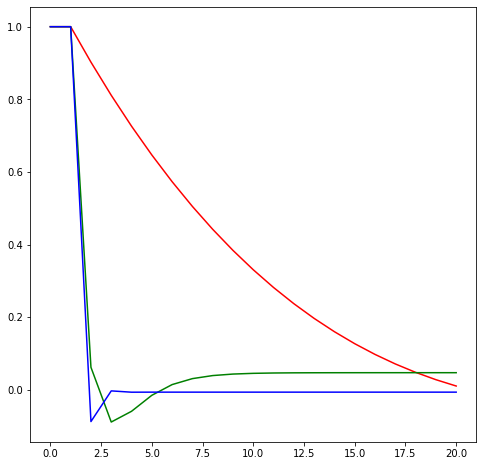

1. Plot the training data points (x,y) with their labels l in colors (blue for label 0 and red for label 1)


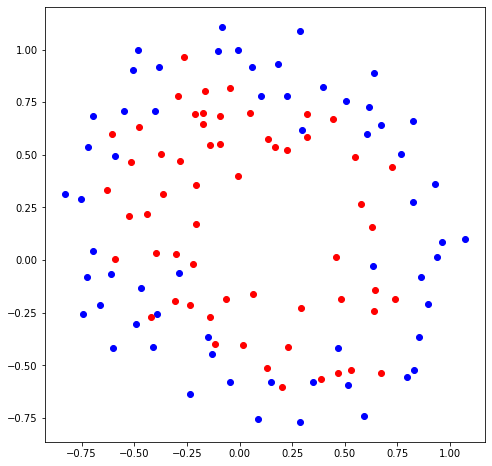

2. Plot the training error  J(θ) at every iteration of gradient descent until convergence with varying regularization parameters
- choose a value for λ1​ in such a way that over-fitting is demonstrated (in red color) [3pt]
- choose a value for λ2​ in such a way that just-right is demonstrated (in green color) [3pt]
- choose a value for λ3​ in such a way that under-fitting is demonstrated (in blue color) [3pt]


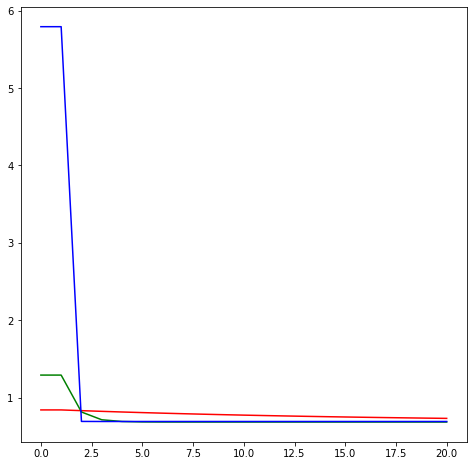

3. Display the values of the chosen regularization parameters
- display the value of the chosen λ1​ for the demonstration of over-fitting (in red color) [1pt]
0.001
- display the value of the chosen λ2 for the demonstration of just-right (in green color) [1pt]
0.01
- display the value of the chosen λ3​ for the demonstration of under-fitting (in blue color) [1pt]
0.1

4. Plot the training accuracy with varying regularization parameters
- plot the training accuracy with the chosen λ1​ for over-fitting (in red color) [3pt]
- plot the training accuracy with the chosen λ2​ for just-right (in green color) [3pt]
- plot the training accuracy with the chosen λ3​ for under-fitting (in blue color) [3pt]


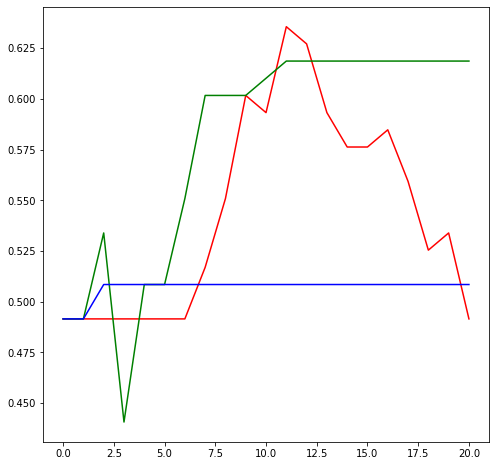

5. Display the final training accuracy with varying regularization parameters
- The final training accuracy obtained with the chosen λ1​ for over-fitting (in red color) [1pt]
49.152542372881356
- The final training accuracy obtained with the chosen λ2​ for just-right (in green color) [1pt]
61.86440677966102
- The final training accuracy obtained with the chosen λ3​ for under-fitting (in blue color) [1pt]
50.847457627118644

6. Plot the optimal classifier with varying regularization parameters superimposed on the training data
- plot the boundary of the optimal classifier with the chosen λ1 for over-fitting at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ3 for under-fitting at convergence (in blue color) [3pt]


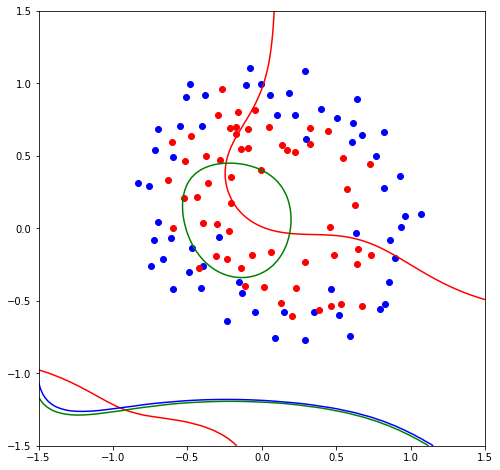

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from decimal import Decimal

scale = 0.1

# Logistic regression
def sigmoid(z):
  return 1 / (1 + np.exp(-scale * z))

# g(x, y, theta)
def g(x, y, theta):
  sigma = 0
  for i in range(10):
    for j in range(10):
      sigma +=  theta[i][j] * (x ** i) * (y ** j)
  return sigma

# Derivative of g(x, y, theta) by theta_ij
def dg_dtheta_ij(x, y, i, j):
  if(i == 0 and j ==0):
    return 1
  else:
    return x ** i * y ** j

# Objective Function
def J(theta, data, lambda_):
  sigma = 0
  for x, y, l in data:
    z = g(x, y, theta)
    sigma += -int(l) * log(sigmoid(z)) - (1 - int(l)) * log(1 - sigmoid(z))

  sigma2 = 0
  for i in range(10):
    for j in range(10):
      sigma2 += theta[i][j] * theta[i][j]

  return (1 / len(data)) * sigma + (lambda_ / 2) * sigma2

# Derivative of Objective Function by theta_ij
def dJ_dtheta_ij(theta, data, i, j, lambda_):
  sigma = 0
  for x, y, l in data:
    z = g(x, y, theta)
    sigma += (sigmoid(z) - int(l)) * dg_dtheta_ij(x, y, i, j)

  return (scale / (len(data))) * sigma + lambda_ * theta[i][j]

# determine whether theta is converged
def is_converged(theta, next_theta):
  for i in range(len(theta)):
    for i in range(len(theta[0])):
      if(Decimal(theta[i][j]) != Decimal(next_theta[i][j])):
        return False
  return True

# the training accuracy is computed by (number of correct predictionstotal) / (number of predictions)
def get_training_accuracy(theta, data):
  correct = 0
  for x, y, l in data:
    if(g(x, y, theta) > 0 and int(l) == 1):
      correct += 1
    elif(g(x, y, theta) < 0 and int(l) == 0):
      correct += 1
    elif(g(x, y, theta) == 0):
      correct += 1
  return correct / len(data)

# load the training data file ('data-nonlinear.txt')
data = np.genfromtxt("drive/My Drive/Colab Notebooks/Machine Learning/Assignment 07/data-nonlinear.txt", delimiter=',')

# each row (x_i,y_i,l_i) of the data consists of a 2-dimensional point (x,y) with its label l
# x,y ∈ R
pointX  = data[:, 0]
pointY  = data[:, 1]
# l ∈ {0,1}
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

# you can use any initial conditions θ = (θ0,θ1, ..., θk-1), for all k
theta1 = np.ones((10, 10), float)
theta2 = np.ones((10, 10), float)
theta3 = np.ones((10, 10), float)

# you should choose a learning rate α in such a way that the convergence is achieved
learning_rate = 10

lambda1 = 0.001
lambda2 = 0.01
lambda3 = 0.1

# the i-th theta, training error J(θ0,θ1,θ2), and training accuracy
theta1_i = [theta1[0][0]]
theta2_i = [theta2[1][1]]
theta3_i = [theta3[2][2]]
J1_i = [J(theta1, data, lambda1)]
J2_i = [J(theta2, data, lambda2)]
J3_i = [J(theta3, data, lambda3)]
training_accuracy1 = [get_training_accuracy(theta1, data)]
training_accuracy2 = [get_training_accuracy(theta2, data)]
training_accuracy3 = [get_training_accuracy(theta3, data)]

steps = 30

#while True:
for step in range(steps):
  # Gradient Descent
  # find optimal parameters θ using the training data
  next_theta1 = np.empty((10, 10), float)

  # find optimal parameters θ using the training data
  for i in range(len(theta1)):
    for j in range(len(theta1[0])):
      next_theta1[i][j] = theta1[i][j] - learning_rate * dJ_dtheta_ij(theta1, data, i, j, lambda1)

  # break the loop if parameters are converged
  if(is_converged(theta1, next_theta1)):
    break

  # save the estimated parameters (θ0​,θ1​,θ2​) at every iteration of gradient descent
  theta1_i.append(theta1[0][0])
  J1_i.append(J(theta1, data, lambda1))
  training_accuracy1.append(get_training_accuracy(theta1, data))

  # update the theta
  theta1 = next_theta1

while True:
#for step in range(steps):
  # Gradient Descent
  # find optimal parameters θ using the training data
  next_theta2 = np.empty((10, 10), float)

  # find optimal parameters θ using the training data
  for i in range(len(theta2)):
    for j in range(len(theta2[0])):
      next_theta2[i][j] = theta2[i][j] - 5 * learning_rate * dJ_dtheta_ij(theta2, data, i, j, lambda2)

  # break the loop if parameters are converged
  if(is_converged(theta2, next_theta2)):
    break

  # save the estimated parameters (θ0​,θ1​,θ2​) at every iteration of gradient descent
  theta2_i.append(theta2[0][0])
  J2_i.append(J(theta2, data, lambda2))
  training_accuracy2.append(get_training_accuracy(theta2, data))

  # update the theta
  theta2 = next_theta2

while True:
#for step in range(steps):
  # Gradient Descent
  # find optimal parameters θ using the training data
  next_theta3 = np.empty((10, 10), float)

  # find optimal parameters θ using the training data
  for i in range(len(theta3)):
    for j in range(len(theta3[0])):
      next_theta3[i][j] = theta3[i][j] - learning_rate * dJ_dtheta_ij(theta3, data, i, j, lambda3)

  # break the loop if parameters are converged
  if(is_converged(theta3, next_theta3)):
    break

  # save the estimated parameters (θ0​,θ1​,θ2​) at every iteration of gradient descent
  theta3_i.append(theta3[0][0])
  J3_i.append(J(theta3, data, lambda3))
  training_accuracy3.append(get_training_accuracy(theta3, data))

  # update the theta
  theta3 = next_theta3

# For adjusting hyper-parameters
print(len(theta1_i))
print(len(theta2_i))
print(len(theta3_i))
print('- Plot the estimated parameters θ at every iteration of gradient descent until convergence')
print('- the colors for the parameters (θ1,θ2,θ3) should be red, green, blue, respectively')
plt.figure(figsize=(8, 8))
x = range(len(theta1_i))
plt.plot(x, theta1_i, color='red')
plt.plot(x, theta2_i, color='green')
plt.plot(x, theta3_i, color='blue')
plt.show()

# 1. Plot the training data [1pt]
print('1. Plot the training data points (x,y) with their labels l in colors (blue for label 0 and red for label 1)')
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, color='blue')
plt.scatter(pointX1, pointY1, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 2. Plot the training error with varying regularization parameters
# the above three curves should be presented all together in a single figure
print('2. Plot the training error  J(θ) at every iteration of gradient descent until convergence with varying regularization parameters')
plt.figure(figsize=(8, 8))
print('- choose a value for λ1​ in such a way that over-fitting is demonstrated (in red color) [3pt]')
plt.plot(x, J1_i, color='red')
print('- choose a value for λ2​ in such a way that just-right is demonstrated (in green color) [3pt]')
plt.plot(x, J2_i, color='green')
print('- choose a value for λ3​ in such a way that under-fitting is demonstrated (in blue color) [3pt]')
plt.plot(x, J3_i, color='blue')
plt.show()

# 3. Display the values of the chosen regularization parameters
print('3. Display the values of the chosen regularization parameters')
print('- display the value of the chosen λ1​ for the demonstration of over-fitting (in red color) [1pt]')
print('\033[91m' + str(lambda1) + '\033[0m')
print('- display the value of the chosen λ2 for the demonstration of just-right (in green color) [1pt]')
print('\033[92m' + str(lambda2) + '\033[0m')
print('- display the value of the chosen λ3​ for the demonstration of under-fitting (in blue color) [1pt]')
print('\033[94m' + str(lambda3) + '\033[0m')
print()

# 4. Plot the training accuracy with varying regularization parameters
# the above three curves should be presented all together in a single figure
print('4. Plot the training accuracy with varying regularization parameters')
plt.figure(figsize=(8, 8))
print('- plot the training accuracy with the chosen λ1​ for over-fitting (in red color) [3pt]')
plt.plot(x, training_accuracy1, color='red')
print('- plot the training accuracy with the chosen λ2​ for just-right (in green color) [3pt]')
plt.plot(x, training_accuracy2, color='green')
print('- plot the training accuracy with the chosen λ3​ for under-fitting (in blue color) [3pt]')
plt.plot(x, training_accuracy3, color='blue')
plt.show()

# 5. Display the final training accuracy with varying regularization parameters
print('5. Display the final training accuracy with varying regularization parameters')
print('- The final training accuracy obtained with the chosen λ1​ for over-fitting (in red color) [1pt]')
print('\033[91m' + str(training_accuracy1[-1] * 100) + '\033[0m')
print('- The final training accuracy obtained with the chosen λ2​ for just-right (in green color) [1pt]')
print('\033[92m' + str(training_accuracy2[-1] * 100) + '\033[0m')
print('- The final training accuracy obtained with the chosen λ3​ for under-fitting (in blue color) [1pt]')
print('\033[94m' + str(training_accuracy3[-1] * 100) + '\033[0m')
print()

# 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data
print('6. Plot the optimal classifier with varying regularization parameters superimposed on the training data')
plt.figure(figsize=(8, 8))
y,x=np.ogrid[-1.5:1.5:100j,-1.5:1.5:100j]
# the boundary of the classifier is defined by {(x,y) ∣ g(x,y;θ) = 0}
print('- plot the boundary of the optimal classifier with the chosen λ1 for over-fitting at convergence (in red color) [3pt]')
plt.contour(x.ravel(), y.ravel(), g(x, y, theta1), [0], colors='red')
print('- plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color) [3pt]')
plt.contour(x.ravel(), y.ravel(), g(x, y, theta2), [0], colors='green')
print('- plot the boundary of the optimal classifier with the chosen λ3 for under-fitting at convergence (in blue color) [3pt]')
plt.contour(x.ravel(), y.ravel(), g(x, y, theta3), [0], colors='blue')
# plot the training data points (x,y) with their labels l
# in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
plt.scatter(pointX0, pointY0, color='blue')
plt.scatter(pointX1, pointY1, color='red')
plt.show()


